In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

seed = 1
np.random.seed(seed) # ensure same result for testing purpose

In [3]:
#load the dataset
cardiovascular = pd.read_csv('dataset.csv')

# Data Exploration and Visualizing

In [11]:
cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [12]:
print(cardiovascular.head()) # First 5 data
cardiovascular_shape = cardiovascular.shape
row_count = cardiovascular_shape[0]
col_count = cardiovascular_shape[1]
print(f"Shape: {cardiovascular_shape}")
print(f"Total of {row_count} records")
print(f"Total of {col_count} Columns")

   Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
0  Female   42       172.2        82.9             no     low       yes   
1  Female   19       175.3        80.0            yes    none       yes   
2  Female   43       158.3        81.9            yes    none       yes   
3  Female   23       165.0        70.0            yes     low        no   
4    Male   23       169.0        75.0            yes     low       yes   

   Vege_day  Meals_day      Snack Smoking  Water_intake(L) Transportation  \
0         3          3  Sometimes      no             2.72            car   
1         2          1  Sometimes      no             2.65            bus   
2         3          1  Sometimes      no             1.89            car   
3         2          1  Sometimes      no             2.00            bus   
4         3          3  Sometimes      no             2.82            bus   

   Exercise        TV  Income Discipline Cardiovascular_risk(y)  
0         3      rar

In [16]:
# Check for null values
cardiovascular.isnull().any()

Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [55]:
# Seperates to categorial and numberics for visualization purpose
cardiovascular_num = cardiovascular.select_dtypes(exclude="object")
cardiovascular_cat = cardiovascular.select_dtypes(include="object")

# Some data are numeric but can be analyse as categorical for visualization
cardiovascular_numeric_cat = cardiovascular[["Vege_day", "Meals_day", "Exercise"]]

print(cardiovascular_num.info(), end="\n\n")
print(cardiovascular_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2100 non-null   int64  
 1   Height(cm)       2100 non-null   float64
 2   Weight(kg)       2100 non-null   float64
 3   Vege_day         2100 non-null   int64  
 4   Meals_day        2100 non-null   int64  
 5   Water_intake(L)  2100 non-null   float64
 6   Exercise         2100 non-null   int64  
 7   Income           2100 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 131.4 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2100 non-null   object
 1   Family_history          2100 non-null   object
 2   Alcohol                 2100 non-null   object
 3   Junk

In [27]:
cardiovascular_num.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


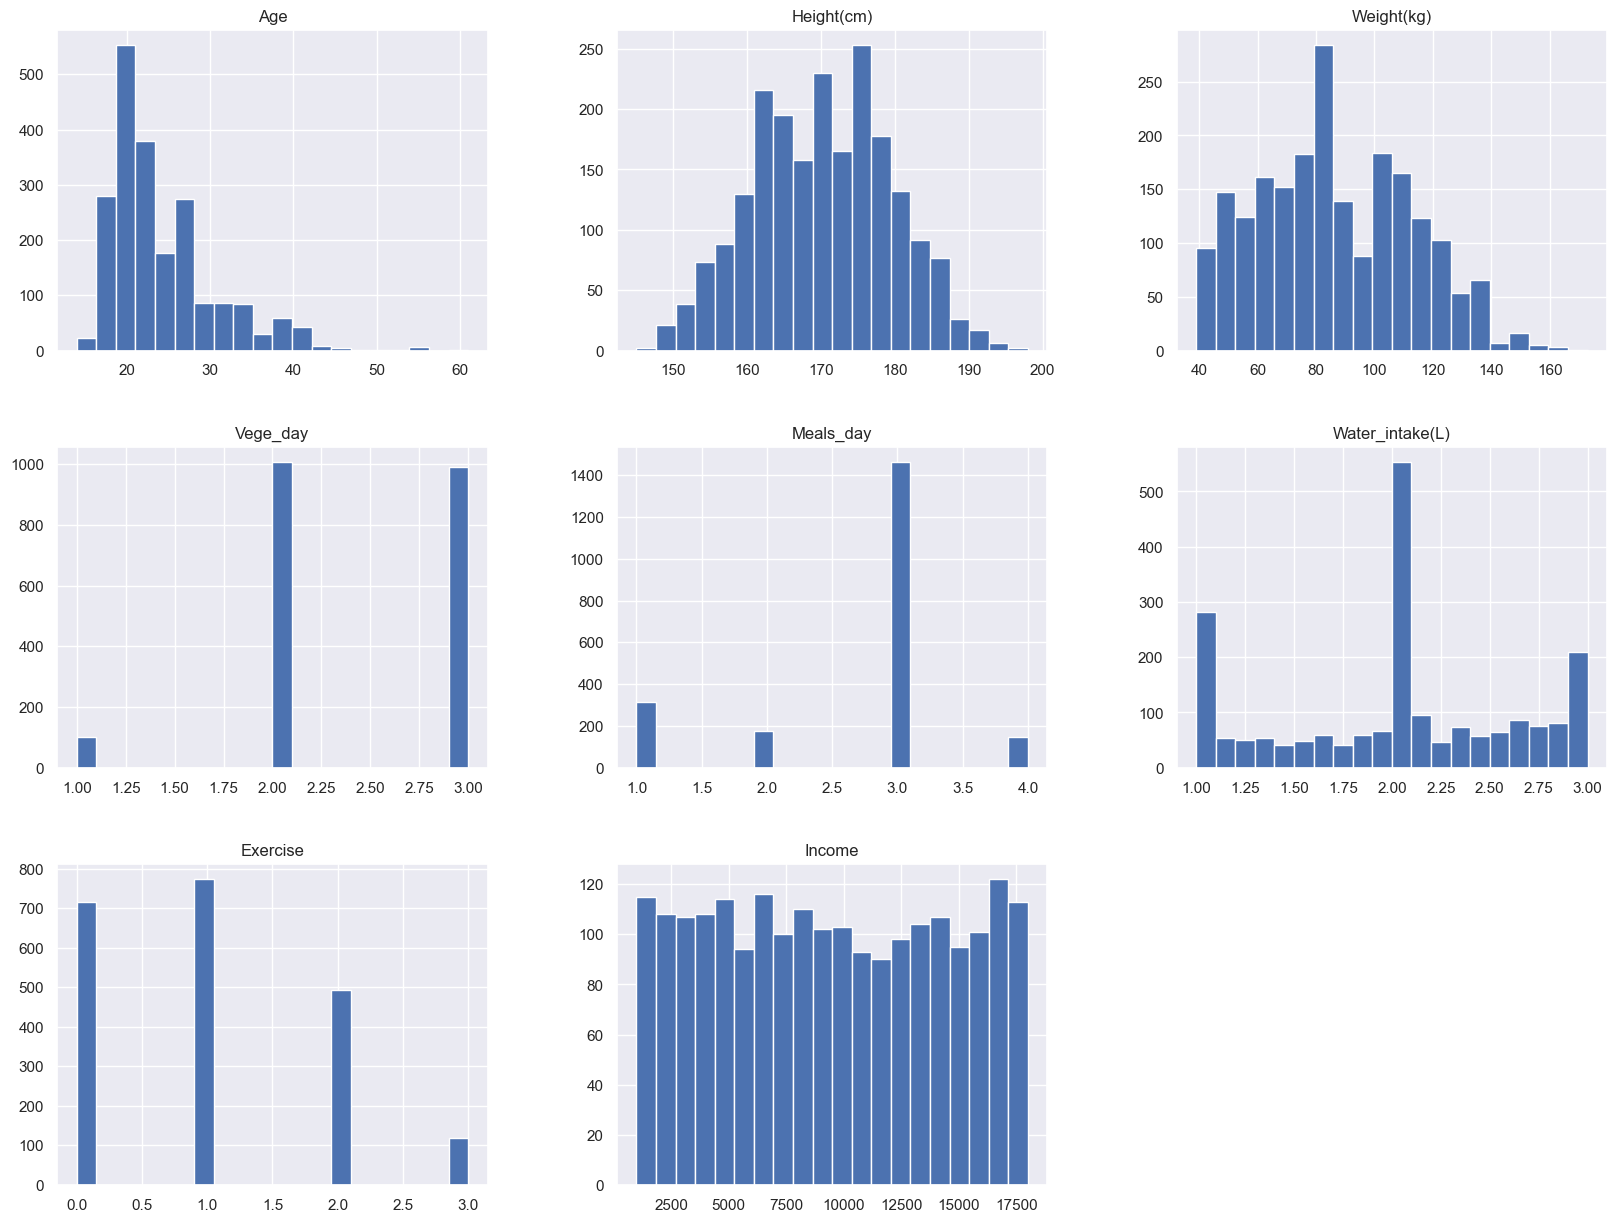

In [47]:
# Plot histogram for numerical columns
cardiovascular_num.hist(bins=20, figsize=(20,15))
plt.show()

                     Skew
Age              1.527517
Height(cm)      -0.008299
Weight(kg)       0.255598
Vege_day        -0.431385
Meals_day       -1.067331
Water_intake(L) -0.103556
Exercise         0.458999
Income           0.031238
Age


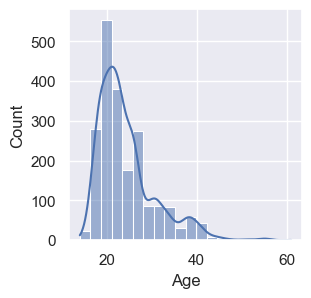

Height(cm)


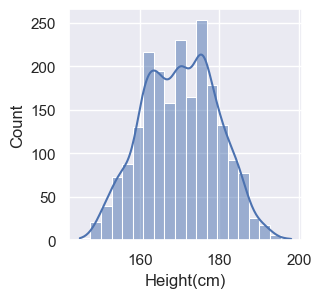

Weight(kg)


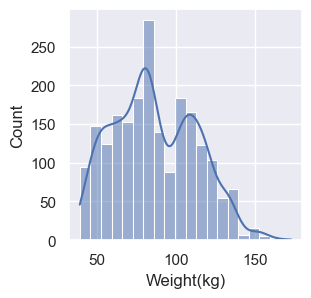

Vege_day


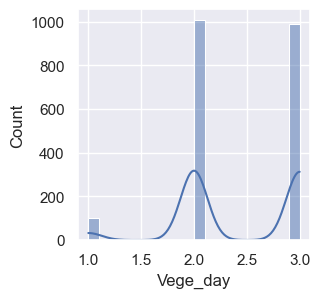

Meals_day


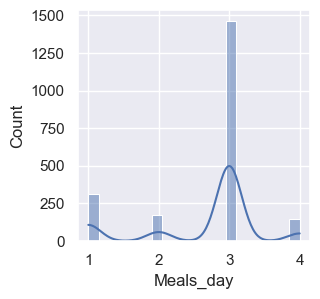

Water_intake(L)


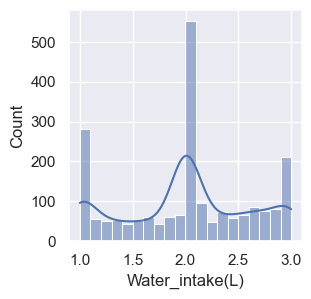

Exercise


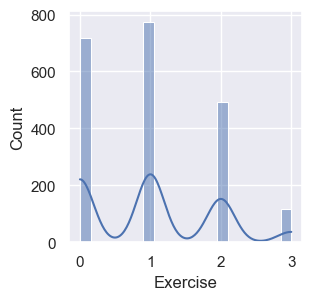

Income


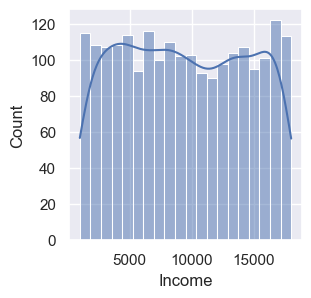

In [46]:
# Check the skewness of the data
skew = cardiovascular_num.skew()
skewness = pd.DataFrame(data=skew, columns=["Skew"])
print(skewness)
sns.set(rc = {"figure.figsize": (3, 3)})

for col in cardiovascular_num:
    print(col)
    sns.histplot(cardiovascular[col], bins=20, kde=True)
    plt.show()

In [63]:
# Check the categorical data
cardiovascular_cat_visualise = cardiovascular_cat.columns.union(cardiovascular_numeric_cat.columns)
for col in (cardiovascular_cat_visualise):
    print(cardiovascular[col].value_counts().sort_index())
    print()

Alcohol
high         1
low       1394
medium      70
none       635
Name: count, dtype: int64

Cardiovascular_risk(y)
high      967
low       557
medium    576
Name: count, dtype: int64

Discipline
no     2004
yes      96
Name: count, dtype: int64

Exercise
0    716
1    773
2    493
3    118
Name: count, dtype: int64

Family_history
no      385
yes    1715
Name: count, dtype: int64

Gender
Female    1040
Male      1060
Name: count, dtype: int64

Junk_food
no      245
yes    1855
Name: count, dtype: int64

Meals_day
1     315
2     175
3    1462
4     148
Name: count, dtype: int64

Smoking
no     2056
yes      44
Name: count, dtype: int64

Snack
Always          53
Frequently     242
No              51
Sometimes     1754
Name: count, dtype: int64

TV
moderate    910
often       243
rare        947
Name: count, dtype: int64

Transportation
bicycle          6
bus           1573
car            454
motorcycle      11
walk            56
Name: count, dtype: int64

Vege_day
1     102
2    1007

In [ ]:
for coli

In [44]:
corr_matrrx = cardiovascular.corr()

ValueError: could not convert string to float: 'Female'